In [1]:
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.core.display import display, SVG
from rxn_chemutils.depict import smiles_depict_url
from sklearn.cluster import KMeans, Birch
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, normalize

In [3]:
from rxn_class_token.clustering.data_loading import (
    load_df, FP_COLUMN, RXN_SMILES_COLUMN
)


In [4]:
from rxn_class_token.clustering.clusterer import ClustererFitter, inspect_clusters

In [11]:
# Setting environment variables

%env DATA_CSV_PATH =/Users/ato/Library/CloudStorage/Box-Box/IBM RXN for Chemistry/Data/class_token/std_pistachio_201002/data.csv
%env FPS_SAVE_PATH =/Users/ato/Library/CloudStorage/Box-Box/IBM RXN for Chemistry/Data/class_token/std_pistachio_201002/data.fps.pkl
%env FPS_MODEL_PATH =/Users/ato/Desktop/Git/rxnfp/rxnfp/models/transformers/bert_ft

env: DATA_CSV_PATH=/Users/ato/Library/CloudStorage/Box-Box/IBM RXN for Chemistry/Data/class_token/std_pistachio_201002/data.csv
env: FPS_SAVE_PATH=/Users/ato/Library/CloudStorage/Box-Box/IBM RXN for Chemistry/Data/class_token/std_pistachio_201002/data.fps.pkl
env: FPS_MODEL_PATH=/Users/ato/Desktop/Git/rxnfp/rxnfp/models/transformers/bert_ft


In [12]:
# ### Loading dataset

# + tags=[]
df = load_df()
fps = np.array(df[FP_COLUMN].tolist())
print(fps.shape)
df.head()
# -

(2447595, 256)


,Unnamed: 0,rxn,rxnclasses,classes,fps
0,0,CO.COC(=O)c1ccc2cc(C(=O)OC)ccc2c1.[Na+]~[OH-]>...,0.0,0,"[-0.45107901096343994, 1.2968242168426514, 1.8..."
1,1,C1CCOC1.CCO.Cl.Cl[Sn]Cl.O=[N+]([O-])c1cc(Cl)c(...,7.1.1,7,"[-1.44605553150177, -1.6147053241729736, -1.14..."
2,2,CCI.CN(C)C=O.N#Cc1ccc(S(=O)(=O)Cl)cc1.O.O=C([O...,0.0,0,"[-1.4588992595672607, -0.4461292624473572, -1...."
3,3,CCN(C(C)C)C(C)C.CCS(=O)(=O)c1ccc(CCN)cc1.ClCCl...,0.0,0,"[-0.7514338493347168, -0.640468418598175, -0.0..."
4,4,CS(=O)(=O)Cl.ClCCl.N#Cc1ccc(N)cc1.O.c1ccncc1>>...,0.0,0,"[-1.4993270635604858, -0.8310288786888123, -0...."


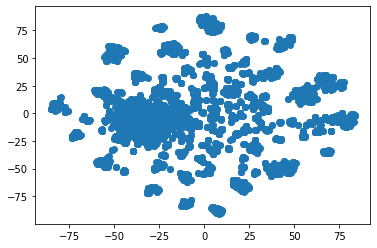

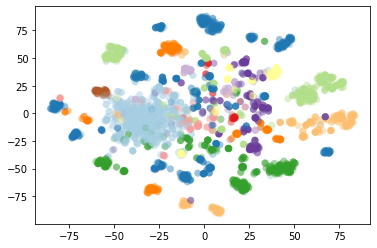

In [13]:
# ### TSNE plot on data

tsne_subset = 5000
tsne_fps = fps[:tsne_subset, :]
tsne_projection = TSNE().fit_transform(tsne_fps)
plt.scatter(*tsne_projection.T)
plt.show()

labels_sub = df['classes'].tolist()[:tsne_subset]
color_palette = sns.color_palette('Paired', 48)
cluster_colors = [color_palette[x] if x >= 0 else (0.5, 0.5, 0.5) for x in labels_sub]
plt.scatter(*tsne_projection.T, s=50, linewidth=0, c=cluster_colors, alpha=0.25)
plt.show()

In [14]:
# ### Clustering functionality


def get_stats(
    clusterer: ClustererFitter, df: pd.DataFrame, data: np.ndarray, print_plots: bool = True
):
    df = df.copy()

    kmean_class = clusterer.predict(data)
    df['kmeans_class'] = kmean_class.tolist()

    grouped_df = df.groupby(['classes', 'kmeans_class']).size().unstack(fill_value=0)
    print(grouped_df.to_string())

    pred_matrix = grouped_df.to_numpy()

    if print_plots:
        _ = plt.subplots(figsize=(10, 7))
        normalized_array = normalize(pred_matrix, norm="l1")
        plt.imshow(normalized_array)
        plt.show()

        _ = plt.subplots(figsize=(10, 7))
        normalized_array = normalize(pred_matrix, norm="l1", axis=0)
        plt.imshow(normalized_array)
        plt.show()


def show_in_tsne(clusterer):
    labels_sub = clusterer.predict(tsne_fps)
    color_palette = sns.color_palette('Paired', 48)
    cluster_colors = [color_palette[x] if x >= 0 else (0.5, 0.5, 0.5) for x in labels_sub]
    plt.scatter(*tsne_projection.T, s=50, linewidth=0, c=cluster_colors, alpha=0.25)
    plt.show()

kmeans_class     0       1      2      3       4      5      6      7      8      9      10     11     12     13     14     15      16     17     18     19     20     21     22     23     24     25     26     27     28     29
classes                                                                                                                                                                                                                          
0              4661  139735   1184   1908    1334   1951  83191   1678   1322    308   1263    834   3093   1777    522   7410  358228   1877  30360   2019    459   3019   9279    507    892   2090   2803   5518    204   1435
1             12730    9804  94521    101      21  51781   2133     17  39346     16  18372    126   1431      3      8  10007    1025    364   1249    153  26848  46207  20574      7     39   7802  46478   1496     25  51515
2             35834   13336     27  19476  152937   5762    702      0      4     55      8  932

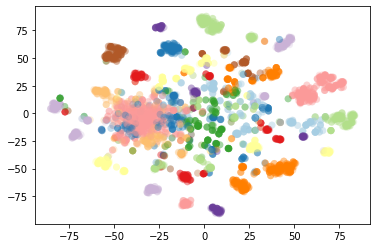

kmeans_class     0       1      2       3      4       5      6      7      8       9       10     11     12     13     14     15     16     17     18     19
classes                                                                                                                                                      
0              6921  186450   2798     658   1750    1565   5647   7319   7777     910  425293    898   2688   3909   1618   4534   1856   2651   2762   2857
1             65432    6674   1607      90  93196      51  11892   6631  11375      12    5096     99  11391  57057  49672   8780  44372  10241     45  60486
2             17582    5171   2845     228     50  152926  24858   2021    228     107   11286  69174      4   2229     13  54714   6073  19247    482    785
3              2014   13902  21859     330   8177       0    163  31337   6475       5    8810    167  99008    159    833   1211     15    508   1008   2190
4              9070    5876   4262       1    183   

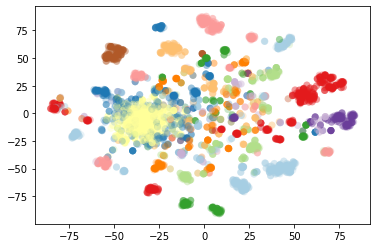

kmeans_class     0       1      2       3      4       5      6       7      8       9       10     11     12     13     14
classes                                                                                                                    
0              3246     636  18384  541093  64575    4318   2369    3405   2297    1113    1538   3856  12306   9028   2697
1             40506      91  11313    9039   6659  143427  99006   13199     25     151      35   5994  27366  76144  11244
2             28724     172   9720   15381   1249     311  56630     119    139     123  149790   7950  54955  19566  25194
3               429      10  38196   19198  11389     359   1230  123789     79     251       0    425    799   1807    210
4                90       1  58533    2193    276     148    275     272    394     249       8     19   3479   1370     85
5              6021       2   1261     567    119      19   1158       0      0   16825      22     11   3285   1769    914
6       

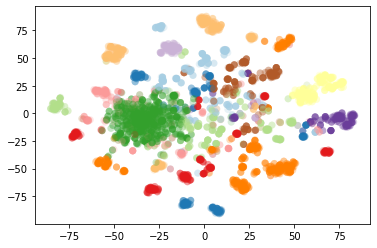

kmeans_class     0       1      2       3      4      5      6       7      8       9       10     11     12     13     14
classes                                                                                                                   
0             18304    1670   3068    1457   1176  60853   3303     928    894     756  569060   1442    196   6995    759
1             38340      42  99166    3456  87468  18708  95609      23  29093      46   12789  38868      1  19001   1589
2             20722   16184   1108    9575   5454  45745     14  148931      9  105550   13785     11      5   2930      0
3             39195      52   1370      11      3   7372    544       1  32758       2   20553     21      0  27449  68840
4              4813      16    115       4      3  48219      6       3      3       0    3297      6      2  10905      0
5              9328      10      5   16562    127   3826   1114       8      0      39     691      6      0    256      1
6             19

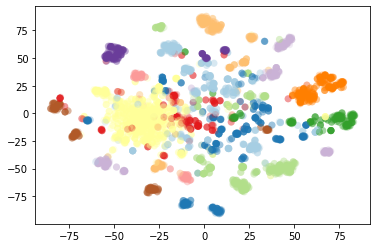

KeyboardInterrupt: 

In [15]:
# ### Tests - try out different clustering approaches

clusterer = ClustererFitter(data=fps, scaler=PCA(n_components=30), clusterer=KMeans(n_clusters=30))
get_stats(clusterer, df, fps, print_plots=False)
show_in_tsne(clusterer)

clusterer = ClustererFitter(data=fps, scaler=PCA(n_components=10), clusterer=KMeans(n_clusters=20))
get_stats(clusterer, df, fps, print_plots=False)
show_in_tsne(clusterer)

clusterer = ClustererFitter(data=fps, scaler=StandardScaler(), clusterer=KMeans(n_clusters=15))
get_stats(clusterer, df, fps, print_plots=False)
show_in_tsne(clusterer)

clusterer = ClustererFitter(data=fps, scaler=StandardScaler(), clusterer=KMeans(n_clusters=3))
get_stats(clusterer, df, fps, print_plots=False)
show_in_tsne(clusterer)

In [16]:
# ### Optimal PCA dimension
#
# https://medium.com/@dmitriy.kavyazin/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2

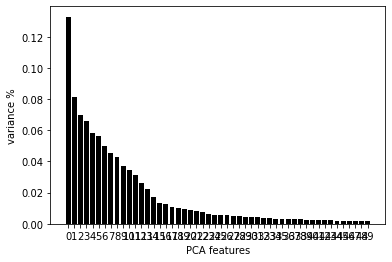

In [18]:
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(fps)
# Create a PCA instance: pca
pca = PCA(n_components=50)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)  # Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

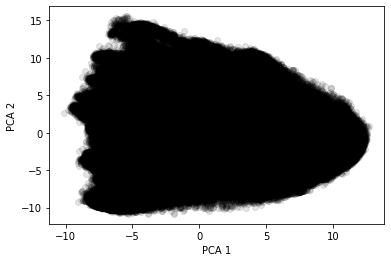

In [19]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

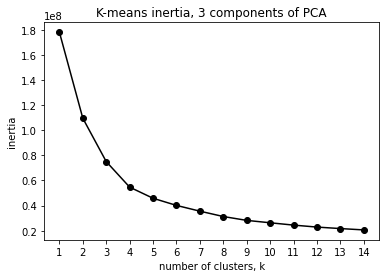

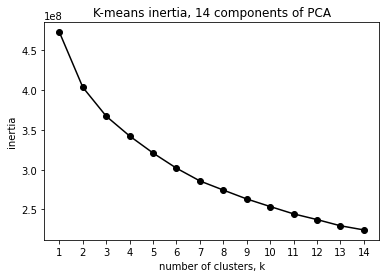

In [21]:
# ### Find k-means elbow
#
# https://medium.com/@dmitriy.kavyazin/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2


def elbow_curve(
    components_df: pd.DataFrame, n_components: int, plot_from: int = 1, plot_until: int = 15
):
    ks = range(plot_from, plot_until)

    inertias = []
    for k in ks:
        # Create a KMeans instance with k clusters: model
        model = KMeans(n_clusters=k)

        # Fit model to samples
        model.fit(components_df.iloc[:, :n_components])

        # Append the inertia to the list of inertias
        inertias.append(model.inertia_)

    plt.plot(ks, inertias, '-o', color='black')
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.title(f'K-means inertia, {n_components} components of PCA')
    plt.show()


elbow_curve(PCA_components, n_components=3)

# elbow_curve(PCA_components, n_components=3, plot_from=15, plot_until=30)

# elbow_curve(PCA_components, n_components=5)

elbow_curve(PCA_components, n_components=14)

kmeans_class       0       1       2       3
classes                                     
0               5555  613728   31336   20242
1             117949   13819  295800   16631
2             269472   16845   54748   28958
3               1603   21739   65609  109220
4               5287    9740   41549   10816
5              18132     708   10184    2949
6                 56    9274     413  242239
7                  0    1362   50445   62537
8                  1    4077   34852    8769
9               5912    9483   91442   56756
10                21    3837   39250   13803
11                29   23886     196    6336


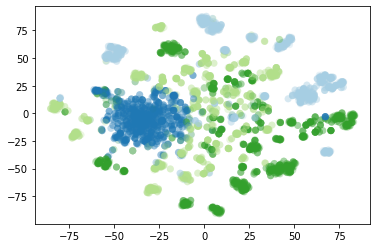

In [22]:
# ### Selected clustering

selected_n_components = 3
selected_n_clusters = 4

clusterer = ClustererFitter(
    data=fps,
    scaler=PCA(n_components=selected_n_components),
    clusterer=KMeans(n_clusters=selected_n_clusters)
)
get_stats(clusterer, df, fps, print_plots=False)
show_in_tsne(clusterer)

kmeans_class       0       1       2       3      4       5
classes                                                    
0             195246    7911    5627  451605   7359    3113
1              14889  255913   13200    4008  52256  103933
2               8127   91080   29439   11605   5233  224539
3              21055   21805   86378    8702  59364     867
4              22154   21890    1690    1588  17176    2894
5               1372    6456    1843     324   4511   17467
6               2064      24  184589    7764  57518      23
7               1191     218   47018     549  65368       0
8               3008     211    1360    1371  41748       1
9               7173   40254   38558    5462  71161     985
10              4863   24952    6691    2129  18269       7
11             28651      23     941     249    563      20


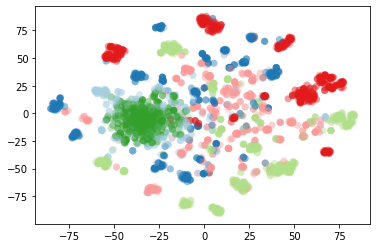

In [23]:
# ### Selected clustering

selected_n_components = 3
selected_n_clusters = 6

clusterer = ClustererFitter(
    data=fps,
    scaler=PCA(n_components=selected_n_components),
    clusterer=KMeans(n_clusters=selected_n_clusters)
)
get_stats(clusterer, df, fps, print_plots=False)
show_in_tsne(clusterer)

kmeans_class      0       1       2      3       4      5       6       7      8       9
classes                                                                                 
0             14254   10860    2775   3656  592066  23643    4806    4248   3267   11286
1             57264  128339      51    257   10563   9795   30155    2240  96317  109218
2             36532   18789  165460   1358   16227   7639     134   17064  57672   49148
3             10607    1785       1    240   20076  41547  117455     429   4439    1592
4              5577    8323    2481   1773    4795  41773      95      44    684    1847
5              1665      49    1450  16763     657   2116       0     596   1191    7486
6              1898      16      20  98397    9226   5525      49  136784     13      54
7               241   28980       8  38876    1218  10919      42   34029      2      29
8             10166       7       1      9    3411  33787       4      79      5     230
9             34224  

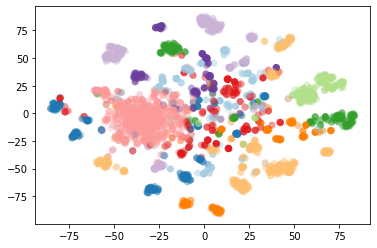

In [24]:
# ### Selected clustering

selected_n_components = 14
selected_n_clusters = 10

clusterer = ClustererFitter(
    data=fps,
    scaler=PCA(n_components=selected_n_components),
    clusterer=KMeans(n_clusters=selected_n_clusters)
)
get_stats(clusterer, df, fps, print_plots=False)
show_in_tsne(clusterer)

Cluster no 0
N#CC1(c2cc(F)cc(S)c2)CCOCC1.N#CC1(c2cccc(F)n2)CCOCC1.N#CC1(c2cccc(S)c2)CCOCC1>>N#CC1(c2cccc(O)c2)CCOCC1


CN(C)C=O.CS(=O)(=O)OCCC1CCCN(C(=O)c2ccc(NC(=O)c3ccccc3Cl)nc2)c2ccc(Cl)cc21.O~O.O=C1NC(=O)c2ccccc21~[K]>>O=C(Nc1ccc(C(=O)N2CCCC(CCN3C(=O)c4ccccc4C3=O)c3cc(Cl)ccc32)cn1)c1ccccc1Cl
[INVALID]
BrCC1CC1.CC1Cc2cc(S)cc(C(=O)O)c2O1.CCO.O.[K+]~[OH-]>>CC1Cc2cc(SCC3CC3)cc(C(=O)O)c2O1
[INVALID]
C1CCOC1.CCn1c(=O)c2c(nc(/C=C/c3ccc(OCCCCN=[N+]=[N-])cc3)n2C)n(CC)c1=O.O.[Na+]~[OH-].c1ccc(P(c2ccccc2)c2ccccc2)cc1>>CCn1c(=O)c2c(nc(/C=C/c3ccc(OCCCCN)cc3)n2C)n(CC)c1=O
[INVALID]
C1CCOC1.CC(C)(C)OC(=O)N1CCC(N)CC1.CSC(=NC(=O)OCc1ccccc1)NC(=O)c1nc(Cl)c(N)nc1N>>CC(C)(C)OC(=O)N1CCC(NC(=NC(=O)OCc2ccccc2)NC(=O)c2nc(Cl)c(N)nc2N)CC1








Cluster no 1
C=O.CCCCN.CN(C)C=O.CO.C[C@@H](N)[C@H](NC(=O)c1ccc(C#CC#CCO)cc1)C(=O)NO.O.O=C(O)C(F)(F)F.[BH3-]C#N~[Na+]>>CN[C@H](C)[C@H](NC(=O)c1ccc(C#CC#CCO)cc1)C(=O)NO
[INVALID]
C=O.CC(=O)O.CNC.O=C(COc1ccc2ccccc2c1)N1CCc2ccoc2C1>>CN(C)Cc1cc2c(o1)CN(C(=O)COc1ccc3ccccc3c1)CC2


CC(=O)O.CC(=O)O[BH-](OC(C)=O)OC(C)=O~[Na+].CC(C)=O.CCO.CCOC(=O)C[C@H]1CC[C@H](N)CC1~Cl.ClCCCl.O.O=C([O-])[O-]~[K+]~[K+]>>CCOC(=O)C[C@H]1CC[C@H](NC(C)C)CC1
[INVALID]
CCOC(=O)CC(c1ccc(C)c(CBr)c1)c1ccc2c(nnn2C)c1C.CN(C)C=O.O.[H-]~[Na+].c1c[nH]c(CC2CCCCC2)n1>>Cc1ccc(C(CC(=O)O)c2ccc3c(nnn3C)c2C)cc1Cn1ccnc1CC1CCCCC1
[INVALID]
CC(C)(C)[Si](C)(C)OC(CCC1C(=O)N(c2ccc(F)cc2)C1c1ccc(OCC=CCBr)cc1OCc1ccccc1)c1ccc(F)cc1.Cc1ccccc1.c1c[nH]cn1>>CC(C)(C)[Si](C)(C)OC(CCC1C(=O)N(c2ccc(F)cc2)C1c1ccc(OCC=CCn2ccnc2)cc1OCc1ccccc1)c1ccc(F)cc1


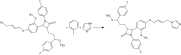







Cluster no 2
CC(C)(C)OC(=O)NN.CCN(C(C)C)C(C)C.CN(C)C(On1nnc2cccnc21)=[N+](C)C~F[P-](F)(F)(F)(F)F.ClCCl.O=C(O)c1cnc(NC2(c3ccccc3)CC2)nc1>>CC(C)(C)OC(=O)NNC(=O)c1cnc(NC2(c3ccccc3)CC2)nc1
[INVALID]
CCN=C=NCCCN(C)C~Cl.COc1cccc(N2CCNCC2)c1.Cc1onc(-c2cccc(C(F)(F)F)c2)c1C(=O)O.ClCCl>>COc1cccc(N2CCN(C(=O)c3c(-c4cccc(C(F)(F)F)c4)noc3C)CC2)c1
[INVALID]
CN(C)C(On1nnc2cccnc21)=[N+](C)C~F[P-](F)(F)(F)(F)F.CN(C)C=O.Cc1nc(N)ccc1CN.N#Cc1cnc2ccc(Cc3cc(C(=O)O)ccn3)cc2c1>>Cc1nc(N)ccc1CNC(=O)c1ccnc(Cc2ccc3ncc(C#N)cc3c2)c1
[INVALID]
CCCOc1ccc(C(=O)O)c(Cl)c1.COc1ccc(CC(OC(C)C)C(=O)[O-])cc1CNC(=O)OC(C)(C)C>>CCCOc1ccc(C(=O)NCc2cc(CC(OC(C)C)C(=O)O)ccc2OC)c(Cl)c1


C1CCOC1.CC#N.CCN(C(C)C)C(C)C.CCS(=O)(=O)N1CC(CC(=O)O)(N2CCC(N[C@@H]3C[C@H]3c3ccccc3)CC2)C1~O=C(O)C(F)(F)F~O=C(O)C(F)(F)F.CN(C)[P+](On1nnc2ccccc21)(N(C)C)N(C)C~F[P-](F)(F)(F)(F)F.CNC>>CCS(=O)(=O)N1CC(CC(=O)N(C)C)(N2CCC(N[C@@H]3C[C@H]3c3ccccc3)CC2)C1
[INVALID]






Cluster no 3
C1CCOC1.CCN(CC)CC.CCO.CCOC(=O)Cl.CCOC(C)=O.N.NC(=NCC(F)(F)F)Nc1cncc(SCCCC(=O)O)n1.O=C(O)/C=C\C(=O)O>>NC(=O)CCCSc1cncc(NC(N)=NCC(F)(F)F)n1~O=C(O)/C=C\C(=O)O
[INVALID]
CO[C@H]1CN(CCn2c(=O)cc(C)c3ccc(C#N)cc32)CC[C@H]1NC(=O)OC(C)(C)C.O=C(O)C(F)(F)F>>CO[C@H]1CN(CCn2c(=O)cc(C)c3ccc(C#N)cc32)CC[C@H]1N~O=C(O)C(F)(F)F
[INVALID]
CO.COC(=O)C(CCc1ccc(N(C(=O)OC(C)(C)C)C(=O)OC(C)(C)C)nc1)NC(=O)OCc1ccccc1.[H][H].[Pd]>>COC(=O)C(N)CCc1ccc(N(C(=O)OC(C)(C)C)C(=O)OC(C)(C)C)nc1


C1COCCO1.CC(C)(C)OC(=O)OC(=O)OC(C)(C)C.O.O=C([O-])[O-]~[Na+]~[Na+].Oc1ccc(C2CCNCC2)cc1>>CC(C)(C)OC(=O)N1CCC(c2ccc(O)cc2)CC1
[INVALID]
CC(C)(C)OC(=O)N1CCN(c2ccccn2)CC1.ClCCl~O=C(O)C(F)(F)F.O~[Na+]~[OH-]>>c1ccc(N2CCNCC2)nc1
[INVALID]






Cluster no 4
CCCOC(=O)Cc1ccc(CBr)cc1.Oc1cccc(-c2c(Cc3ccccc3)cnc3c(C(F)(F)F)cccc23)c1>>CCOC(=O)Cc1ccc(COc2cccc(-c3c(Cc4ccccc4)cnc4c(C(F)(F)F)cccc34)c2)cc1


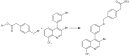

CCOC(=O)c1ccc2cc(C(=O)OCC)[nH]c2c1.CN(C)C=O.C[C@H]1CN(C(=O)OC(C)(C)C)S(=O)(=O)O1.O.[H-]~[Na+]>>CCOC(=O)c1ccc2cc(C(=O)OCC)n([C@H](C)CNC(=O)OC(C)(C)C)c2c1
[INVALID]
C1COCCO1.CC1(C)OC(=O)C(c2ccc(Cl)cc2)O1.COc1cc(CCN)ccc1O>>COc1cc(CCNC(=O)C(O)c2ccc(Cl)cc2)ccc1O


CCCCC(CC1CCCCC1)Cn1ccnc1.CCOCC.O=S(=O)(O)O>>CCCCC(CC1CCCCC1)Cn1ccnc1~O=S(=O)(O)O
[INVALID]
C1CCOC1.CCCC[N+](CCCC)(CCCC)CCCC~[F-].Cc1c([Si](C)(C)C)sc2ccc(C3(O)C(C)CC4CCC3C4)cc12>>Cc1csc2ccc(C34CCC(CC(C)C3(C)O)C4)cc12
[INVALID]






Cluster no 5
COC(=O)c1ccc(C(=O)NCc2ccc(C(=O)NCCOCCO)cc2)s1.NN>>NNC(=O)c1ccc(C(=O)NCc2ccc(C(=O)NCCOCCO)cc2)s1


CO.COCCOc1nc(N)c2nc(OC)n(Cc3ccc(C#N)cc3)c2n1.FB(F)F>>COCCOc1nc(N)c2nc(OC)n(Cc3ccc(C(=O)OC)cc3)c2n1


CC(C)Oc1nc2c(OC(C)(C)C)ccc(Br)c2s1.COC(C)(C)C.CON(C)C(=O)CCl.[Li]CCCC>>CC(C)Oc1nc2c(OC(C)(C)C)ccc(C(=O)CCl)c2s1


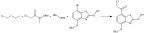

CC(=O)[O-]~[Na+].CO.Cl~NO.O.O=C1CC2CCC(C1)N2Cc1ccccc1.[Na+]~[OH-]>>ON=C1CC2CCC(C1)N2Cc1ccccc1
[INVALID]
CCO.CCOC(=O)CC(=O)CC/C=C(\C)CCC=C(C)C.NN>>CC(C)=CCC/C(C)=C/CCc1cc(O)n[nH]1








Cluster no 6
CC(=O)c1cnc2ccc(Br)cc2c1Nc1ccc(CCN(C)C)cc1.CC1(C)OB(c2cc(F)c(O)c(Cl)c2)OC1(C)C>>CC(=O)c1cnc2ccc(-c3cc(F)c(O)c(Cl)c3)cc2c1Nc1ccc(CCN(C)C)cc1


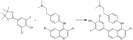

BrBr.ClC(Cl)Cl.ClP(Cl)(Cl)(Cl)Cl.II.O=C1CCCCCc2ccccc2N1>>O=C1Nc2ccccc2CCCCC1Br


CCOC(=O)c1ccc(C(=O)OCC)c2cc(-c3ccc(OCCC(C)CCCC(C)C)cc3)ccc12.Cc1cc(Br)c(C)c2ccccc12>>Cc1cc(-c2ccc(OCCC(C)CCCC(C)C)cc2)c(C)c2ccccc12


CC1(C)OB(c2cccc(C(=O)O)c2)OC1(C)C.CN(C)C=O.Cc1ccc(NC(=O)C2(c3ccc4c(c3)OC(F)(F)O4)CC2)nc1Br.O=C([O-])[O-]~[K+]~[K+]>>Cc1ccc(NC(=O)C2(c3ccc4c(c3)OC(F)(F)O4)CC2)nc1-c1cccc(C(=O)O)c1
[INVALID]
C1COCCO1.CCOC(=O)Cn1cnc2c(N)ncnc21.Cc1cc(Br)c(=O)n2c1C(=O)NC21CCCCC1.O=C(O[Cs])O[Cs]>>CCOC(=O)Cn1cnc2c(Nc3cc(C)c4n(c3=O)C3(CCCCC3)NC4=O)ncnc21


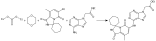







Cluster no 7
C[C@@H](OC(=O)CSc1nnc(Br)n1-c1ccc(C2CC2)c2ccccc12)c1ccccc1.[Li]O>>O=C(O)CSc1nnc(Br)n1-c1ccc(C2CC2)c2ccccc12


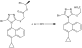

C[C@H](NC(=O)c1cc(Cl)cnc1Oc1ccc(F)cc1)c1ccc(C(=O)OC(C)(C)C)cc1.ClCCl.O=C(O)C(F)(F)F>>C[C@H](NC(=O)c1cc(Cl)cnc1Oc1ccc(F)cc1)c1ccc(C(=O)O)cc1


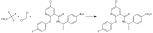

CCO.CCOC(=O)c1cnc(Cl)cc1NC1CCC(F)C1.[Li+]~[OH-]>>O=C(O)c1cnc(Cl)cc1NC1CCC(F)C1
[INVALID]
CCOC(=O)CCC[C@H]1CN(C(=O)OC(C)(C)C)CCN1C(=O)OC(C)(C)C.CO.[Na+]~[OH-]>>CC(C)(C)OC(=O)N1CCN(C(=O)OC(C)(C)C)[C@@H](CCCC(=O)O)C1
[INVALID]
CO.COC(=O)c1cc(-c2cccc(Cl)c2)nc2c1[nH]c1cc(CN3CCN(C(C)(C)C)CC3)ccc12.N>>CC(C)(C)N1CCN(Cc2ccc3c(c2)[nH]c2c(C(N)=O)cc(-c4cccc(Cl)c4)nc23)CC1


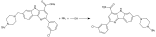







Cluster no 8
COc1ccc(COc2cc(Cl)nc3c(Cl)c(OC)ccc23)cc1.COc1ccc2c(Cl)cc(Cl)nc2c1C>>COc1ccc(COc2cc(Cl)nc3c(C)c(OC)ccc23)cc1


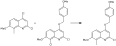

Cc1ccc2c(-c3nnc(SCCCCl)n3C)cccc2n1.Cc1nc2cc3c(cc2o1)CCNCC3>>Cc1ccc2c(-c3nnc(SCCCN4CCc5cc6nc(C)oc6cc5CC4)n3C)cccc2n1~Cl
[INVALID]
C1CCOC1.ClP1N(c2ccccc2)[C@H](c2ccccc2)[C@@H](c2ccccc2)N1c1ccccc1.[AlH4-]~[Li+]>>c1ccc([C@@H]2[C@@H](c3ccccc3)N(c3ccccc3)PN2c2ccccc2)cc1
[INVALID]
CCO.COc1cccc2[nH]nc(N3C(=O)c4ccccc4C3=O)c12.NC(=O)c1cccc(CCl)c1.O=C([O-])[O-]~[K+]~[K+]>>COc1cccc2c1c(N)nn2Cc1cccc(C(N)=O)c1
[INVALID]
CN(C)C(=O)Cl.COc1ccc(-c2nn(C)c3ncc(N)cc23)cc1F.ClCCl.c1ccncc1>>COc1ccc(-c2nn(C)c3ncc(NC(=O)N(C)C)cc23)cc1F


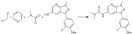







Cluster no 9
CO.C[O-].OCC1CO1>>COCC([O-])CO


C1=COCCC1.C1CCOC1.CCOC(=O)c1c(Br)c(CO)nn1C.CCOC(C)=O.Cc1ccc(S(=O)(=O)[O-])cc1~c1cc[nH+]cc1>>CCOC(=O)c1c(Br)c(COC2CCCCO2)nn1C
[INVALID]
CN(C)C=O.CS(=O)(=O)OCc1cncc(C#N)c1.ClCCl.O=C([O-])[O-]~[Cs+]~[Cs+].O=Cc1cc(Cl)c(O[C@@H]2c3cccc(Br)c3C[C@H]2F)cc1O>>N#Cc1cncc(COc2cc(O[C@@H]3c4cccc(Br)c4C[C@H]3F)c(Cl)cc2C=O)c1
[INVALID]
CN(C)C=O.COCBr.COc1ccc(O)cc1.O=C([O-])[O-]~[K+]~[K+]>>COCOc1ccc(OC)cc1
[INVALID]
C1CCOC1.CS(=O)(=O)Cl.OC[C@H]1CC[C@@H](c2ccnc3ccccc32)CC1>>CS(=O)(=O)OC[C@H]1CC[C@@H](c2ccnc3ccccc32)CC1


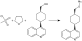

In [25]:
# ### Reaction analysis


def render_smiles(smiles: str):
    try:
        print(smiles)
        display(SVG(url=smiles_depict_url(smiles)))
    except Exception:
        print('[INVALID]')


n_show = 5
df['kmeans_class'] = clusterer.predict(fps)
for i in range(clusterer.n_clusters):
    print('Cluster no', i)
    rxn_smiles = df.loc[df['kmeans_class'] == i][RXN_SMILES_COLUMN].tolist()
    for rxn in random.sample(rxn_smiles, n_show):
        render_smiles(rxn)
    print('\n\n\n\n\n')